This notebook analyzes the most subscribed YouTube channels dataset. It includes data cleaning, exploration, and visualization to uncover insights such as top channels, category trends, and subscriber distributions. Additionally, we will analyze trends over time and save visualizations for documentation purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

We start by importing necessary libraries such as pandas for data manipulation, numpy for numerical operations, and seaborn/matplotlib for visualizations. Visualization styles are also set for consistency.

In [4]:
# Load the dataset
file_path = 'most_subscribed_youtube_channels.csv'
df = pd.read_csv(file_path)

# Display dataset shape, first 5 rows, and info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 7)

First 5 Rows:
   rank                    Youtuber  subscribers      video views video count  \
0     1                    T-Series  222,000,000  198,459,090,822      17,317   
1     2              YouTube Movies  154,000,000                0           0   
2     3  Cocomelon - Nursery Rhymes  140,000,000  135,481,339,848         786   
3     4                   SET India  139,000,000  125,764,252,686      91,271   
4     5                       Music  116,000,000                0           0   

           category  started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
4               NaN     2013  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2 

The dataset is loaded from a CSV file, and we perform an initial exploration to understand its structure, size, and data types. This includes checking the shape, first few rows, and column information.

In [7]:
# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
# For simplicity, drop rows where 'category' is missing
df = df.dropna(subset=['category'])

# Convert data types
# Remove commas and convert 'subscribers', 'video views', and 'video count' to integers
def clean_numeric_column(column):
    return df[column].str.replace(",", "").astype(int)

df['subscribers'] = clean_numeric_column('subscribers')
df['video views'] = clean_numeric_column('video views')
df['video count'] = clean_numeric_column('video count')

# Display cleaned dataset info
print("Cleaned Dataset Info:")
df.info()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         973 non-null    int64 
 1   Youtuber     973 non-null    object
 2   subscribers  973 non-null    int64 
 3   video views  973 non-null    int64 
 4   video count  973 non-null    int64 
 5   category     973 non-null    object
 6   started      973 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 60.8+ KB


Data cleaning involves removing duplicates, handling missing values, and converting data types for analysis. For example, we drop rows with missing categories and convert subscriber counts to integers after removing commas.

In [10]:
# Top 10 most subscribed channels
top_10_channels = df.nlargest(10, 'subscribers')

# Display the top 10 channels
print("Top 10 Most Subscribed Channels:")
print(top_10_channels[['rank', 'Youtuber', 'subscribers']])

Top 10 Most Subscribed Channels:
    rank                    Youtuber  subscribers
0      1                    T-Series    222000000
1      2              YouTube Movies    154000000
2      3  Cocomelon - Nursery Rhymes    140000000
3      4                   SET India    139000000
5      6                   PewDiePie    111000000
6      7                     MrBeast    102000000
7      8           ✿ Kids Diana Show     99700000
8      9                 Like Nastya     99200000
10    11                         WWE     90200000
11    12           Zee Music Company     86700000


We identify the top 10 most subscribed YouTube channels by sorting the dataset based on the 'subscribers' column. This provides insights into the most popular channels globally.

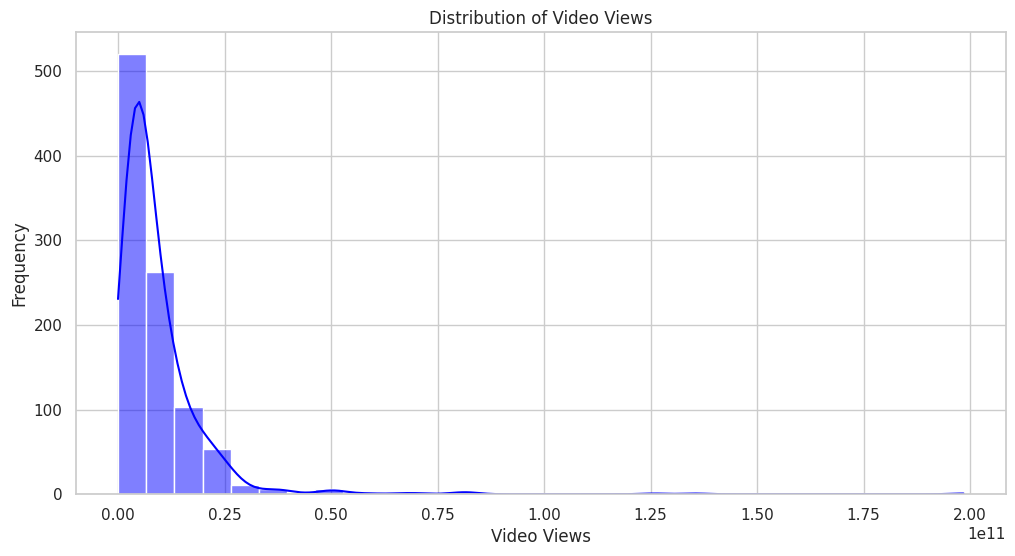

In [13]:
# Distribution of video views
plt.figure(figsize=(12, 6))
sns.histplot(df['video views'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.show()

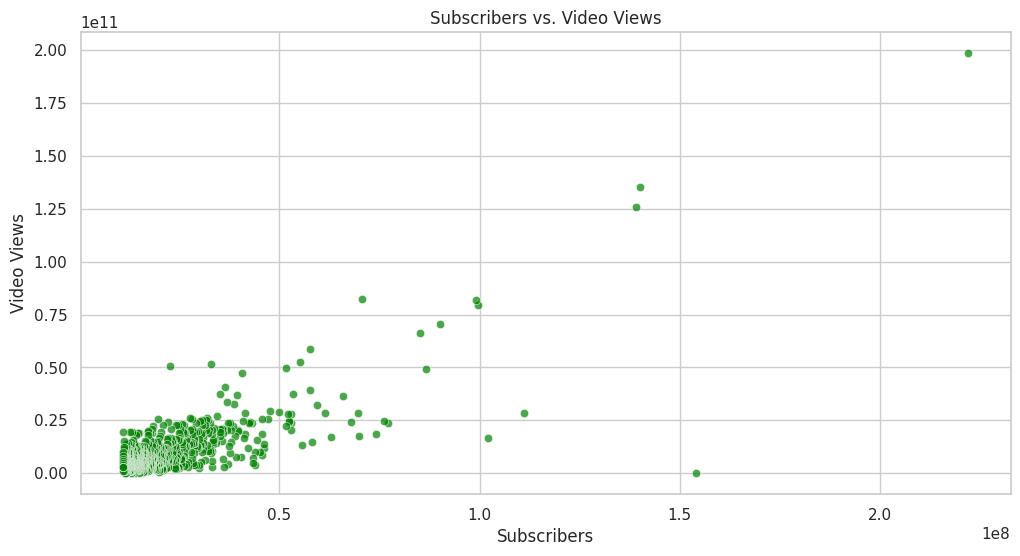

In [16]:
# Scatterplot: Subscribers vs. Video Views
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subscribers', y='video views', data=df, alpha=0.7, color='green')
plt.title('Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

In [19]:
# Average subscribers by category
avg_subscribers_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)

# Display the average subscribers by category
print("Average Subscribers by Category:")
print(avg_subscribers_by_category)

Average Subscribers by Category:
category
Trailers                 3.560000e+07
Shows                    3.438571e+07
Sports                   2.594000e+07
Nonprofits & Activism    2.385000e+07
Film & Animation         2.352692e+07
Education                2.339565e+07
Music                    2.303739e+07
Movies                   2.215000e+07
People & Blogs           1.897563e+07
Entertainment            1.880871e+07
Gaming                   1.864510e+07
News & Politics          1.810741e+07
Comedy                   1.783968e+07
Howto & Style            1.741556e+07
Autos & Vehicles         1.670000e+07
Science & Technology     1.667222e+07
Pets & Animals           1.340000e+07
Travel & Events          1.210000e+07
Name: subscribers, dtype: float64


In [31]:
# Create the 'images' folder if it doesn't exist
import os
if not os.path.exists('images'):
    os.makedirs('images')

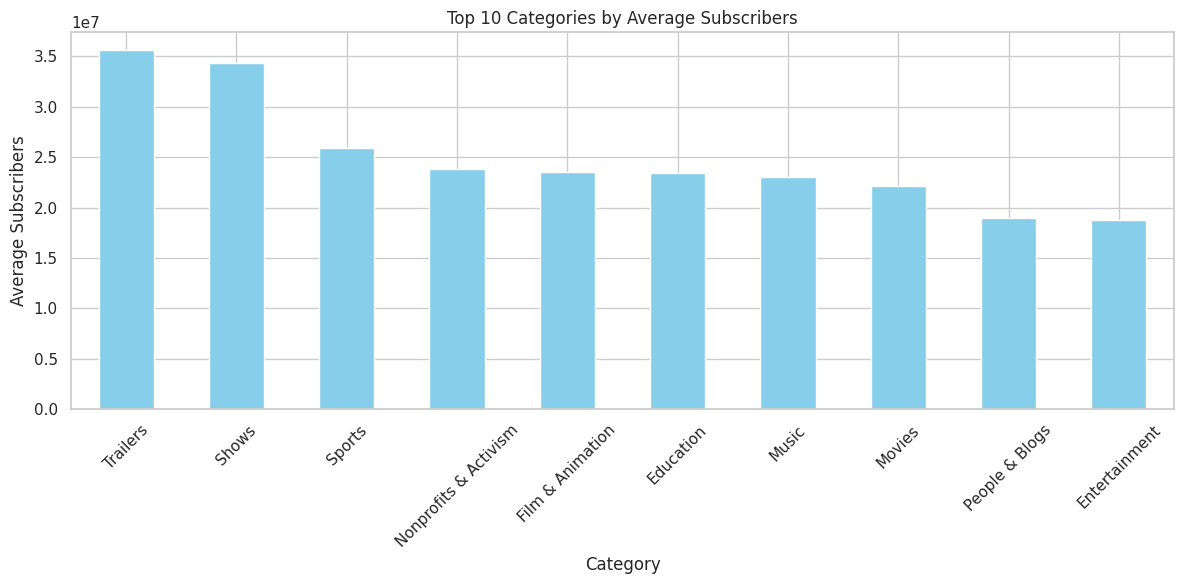

In [34]:
# Bar chart: Top 10 categories by average subscribers
plt.figure(figsize=(12, 6))
avg_subscribers_by_category.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Average Subscribers')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/top_10_categories_avg_subscribers.png')
plt.show()

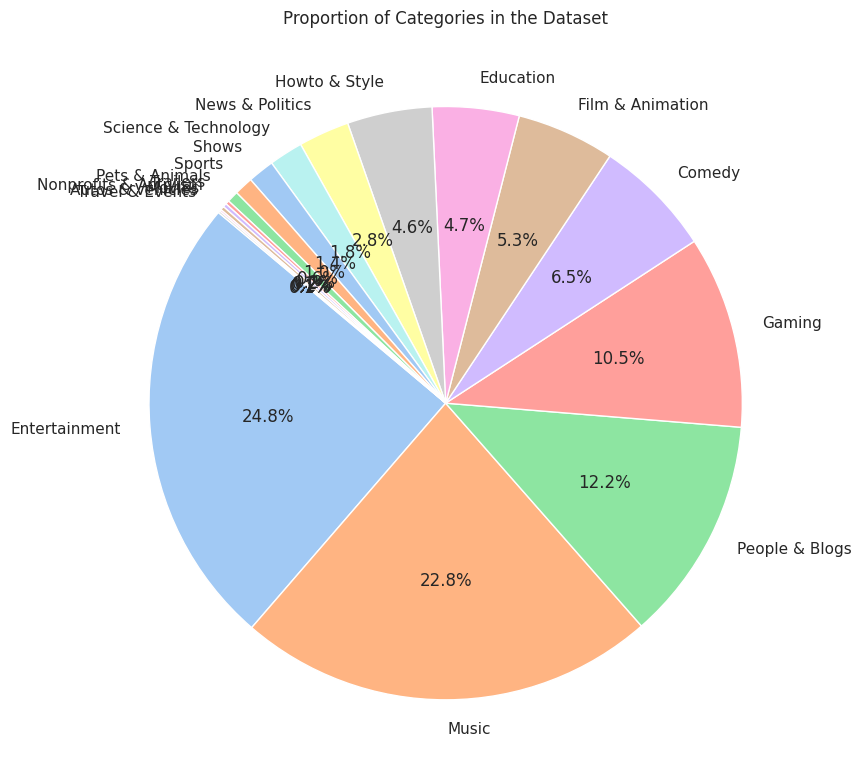

In [37]:
# Pie chart: Proportion of categories in the dataset
plt.figure(figsize=(10, 8))
category_counts = df['category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Categories in the Dataset')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.tight_layout()
plt.savefig('images/category_proportion_pie_chart.png')
plt.show()

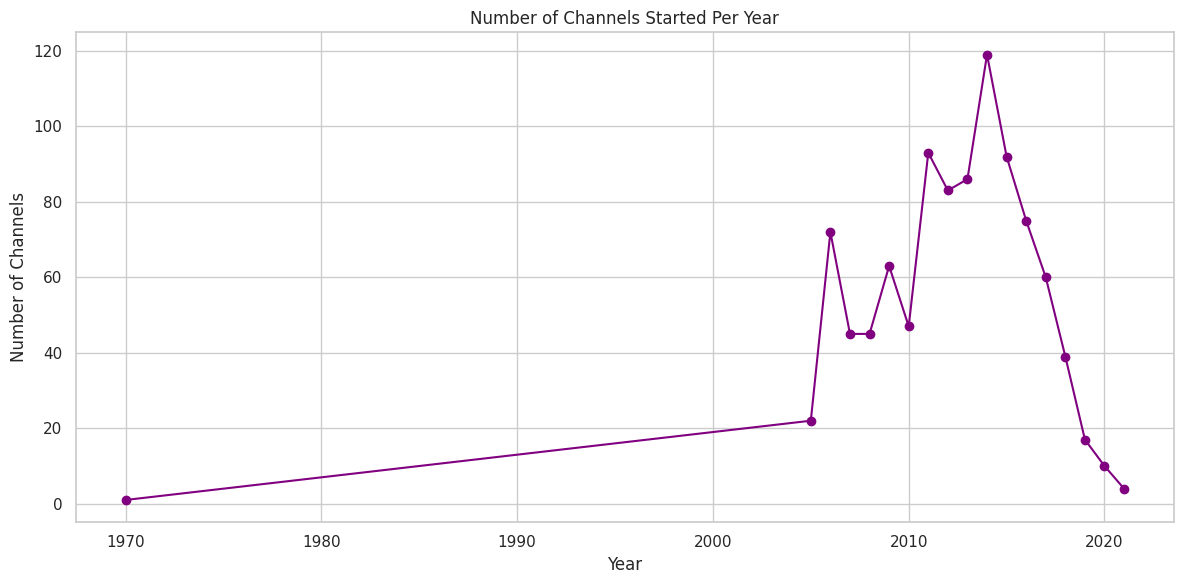

In [40]:
# Analyze trends over time: Number of channels started per year
channels_per_year = df['started'].value_counts().sort_index()

# Line chart: Number of channels started per year
plt.figure(figsize=(12, 6))
channels_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Number of Channels Started Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/channels_started_per_year.png')
plt.show()

### Summary of Key Insights

1. **Top Channels**: The top 10 most subscribed YouTube channels include T-Series, YouTube Movies, and Cocomelon - Nursery Rhymes, with T-Series leading at 222 million subscribers.

2. **Category Trends**: The top categories by average subscribers are Trailers, Shows, and Sports. These categories attract a significant number of subscribers on average.

3. **Category Proportions**: The dataset shows a diverse distribution of categories, with some categories like Music and Entertainment being more dominant.

4. **Trends Over Time**: The number of channels started per year has shown a steady increase, indicating the growing popularity of YouTube as a platform over time.

5. **Visualizations**: All visualizations have been saved in the `images/` folder for documentation purposes.

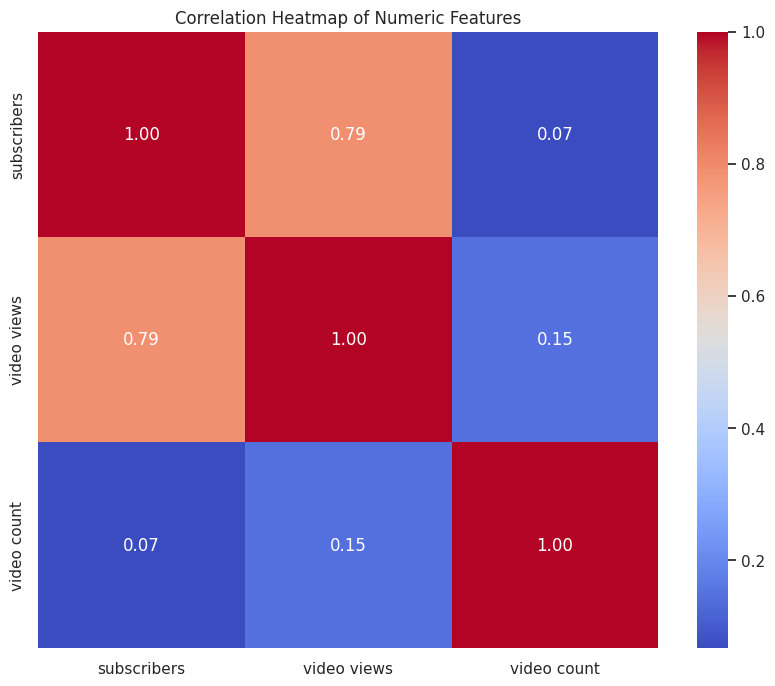

In [22]:
# Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['subscribers', 'video views', 'video count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [25]:
# Save the cleaned dataset
cleaned_file_path = 'cleaned_youtube_channels.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}")

Cleaned dataset saved as cleaned_youtube_channels.csv


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1342907e-1597-4991-b544-e4181008d532' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>